In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('sentiment_analysis_results.csv')

# Filter out reviews with fewer than 50 characters
df = df[df['review_text'].str.len() >= 50]

# Print column names
print("Column names in the dataset:")
print(df.columns.tolist())


Column names in the dataset:
['review_text', 'name', 'author_clean', 'star_rating', 'negative', 'neutral', 'positive', 'compound', 'sentiment']


In [4]:
import pandas as pd
from transformers import pipeline

# 1. Set up zero-shot classifier
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    hypothesis_template="The reader found the book to be {}."
)

# 2. Define candidate labels
candidate_labels = [
    "Very Helpful",
    "Somewhat Helpful",
    "Somewhat Harmful",
    "Very Harmful"
]

# 3. Function to classify one review
def classify_review(text):
    out = classifier(text, candidate_labels, multi_label=False)
    # take the top-scoring label
    top_label = out["labels"][0]
    top_score = out["scores"][0]
    return pd.Series({"predicted_label": top_label, "score": top_score})

# 4. Apply to first 30 reviews and save results to dataframe
results = df["review_text"].iloc[:30].apply(classify_review)
df.loc[:29, "predicted_label"] = results["predicted_label"]
df.loc[:29, "confidence_score"] = results["score"]

# Print results for verification
print("\nClassification results for first 30 reviews:")
print(df[["review_text", "predicted_label", "confidence_score"]].head(30))

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



Classification results for first 30 reviews:
                                          review_text   predicted_label  \
0   Gladwell argues that success is tightly marrie...      Very Helpful   
1   When I think about Malcolm Gladwell, the first...  Somewhat Harmful   
2   I know, you don’t think you have the time and ...  Somewhat Helpful   
3   Didn't exactly read this book - Joe and I list...  Somewhat Harmful   
4   The Banality of Neoliberalism...1) Sloppy meth...  Somewhat Harmful   
5   Occasionally insightful, but Gladwell's scienc...  Somewhat Helpful   
6   Malcolm Gladwell's new book reads like a serie...  Somewhat Harmful   
7   I can save you the trouble of reading the book...  Somewhat Helpful   
8   Malcolm Gladwell writes very interesting and e...  Somewhat Harmful   
9   Outliers : the story of success, Malcolm Gladw...  Somewhat Helpful   
10  "This is not a book about tall trees. It's a b...  Somewhat Helpful   
11  The term I've coined for books such as these i... 

/var/folders/pc/j_zmpc9s0g9frv2jzfv1l51c0000gn/T/ipykernel_19810/3557327499.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.concatenate((values, [values[0]]))


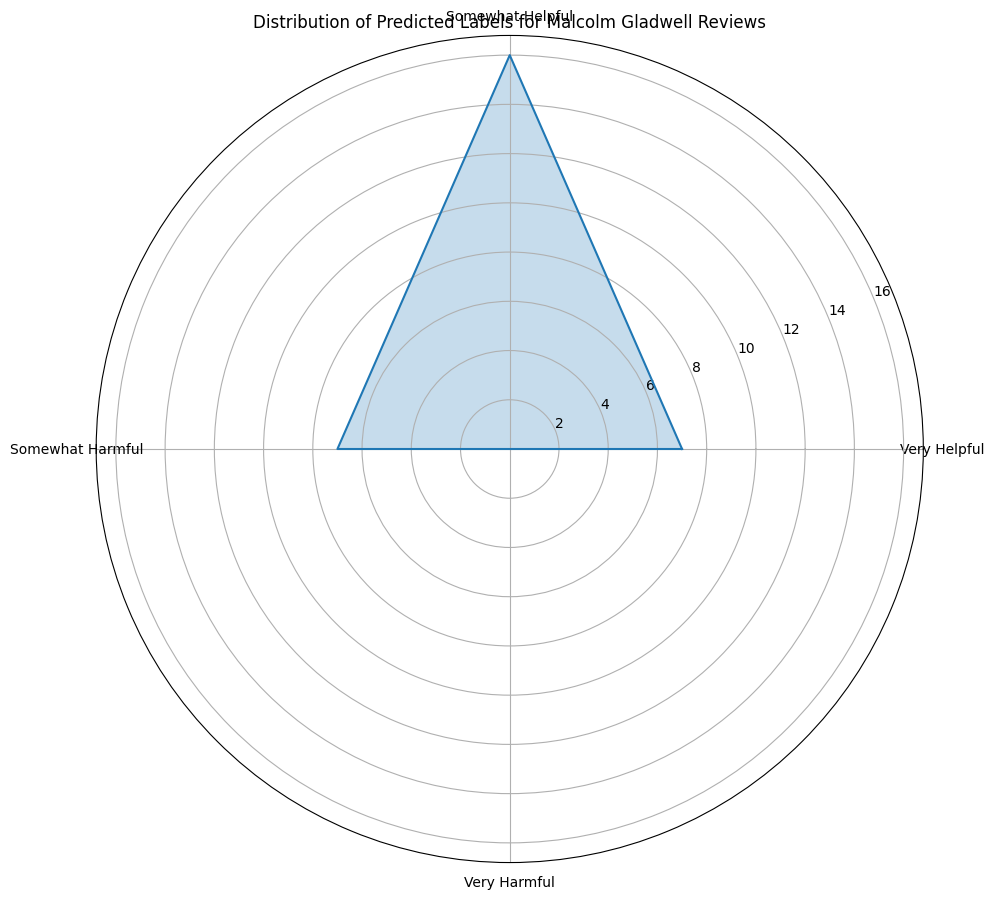

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# in df where author_clean is "Malcolm Gladwell"
# Create a spider chart of the predicted_label counts

# Count occurrences of each label
label_counts = df[df['author_clean'] == 'Malcolm Gladwell']['predicted_label'].value_counts()

# Create a spider chart
categories = ['Very Helpful', 'Somewhat Helpful', 'Somewhat Harmful', 'Very Harmful']
values = label_counts.reindex(categories, fill_value=0)

import matplotlib.pyplot as plt

# Create a spider chart
# Set up the figure and polar subplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# Calculate angles for each category
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# Close the plot by appending the first value
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Plot the data
ax.plot(angles, values)

# Fill the area
ax.fill(angles, values, alpha=0.25)

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add title
plt.title('Distribution of Predicted Labels for Malcolm Gladwell Reviews')

# Show the plot
plt.tight_layout()
plt.show()





In [2]:
# Filter dataframe for Malcolm Gladwell reviews and export to CSV
gladwell_df = df[df['author_clean'] == 'Malcolm Gladwell']
gladwell_df.to_csv('malcolm_gladwell_reviews.csv', index=False)


NameError: name 'df' is not defined

In [4]:
import pandas as pd

# Read the CSV file
gladwell_df = pd.read_csv('malcolm_gladwell_reviews.csv')


# Get unique names and their counts
print("Unique Names and Counts:")
print(gladwell_df['name'].value_counts())
print("\n")

# Get count of each predicted label
print("Predicted Label Distribution:")
print(gladwell_df['predicted_label'].value_counts())
print("\n")

# Extract adjectives from review text and get most frequent ones
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Function to extract adjectives
def extract_adjectives(text):
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Get POS tags
    pos_tags = nltk.pos_tag(tokens)
    # Extract adjectives (JJ, JJR, JJS)
    adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')]
    return adjectives

# Get all adjectives from review texts
all_adjectives = []
for review in gladwell_df['review_text']:
    all_adjectives.extend(extract_adjectives(review))

# Remove stopwords
stop_words = set(stopwords.words('english'))
all_adjectives = [adj for adj in all_adjectives if adj not in stop_words]

# Save all adjectives to a text file
with open('all_adjectives.txt', 'w') as f:
    f.write(' '.join(all_adjectives))


Unique Names and Counts:
name
Outliers: by Malcolm Gladwell | The Story of Success | Summary & Takeaways    30
David and Goliath: Underdogs, Misfits, and the Art of Battling Giants         30
The Tipping Point: How Little Things Can Make a Big Difference                30
Blink: The Power of Thinking Without Thinking                                 30
What the Dog Saw and Other Adventures                                         30
Personality, Character, and Intelligence: Part Three from What the Dog Saw    14
The Art of Failure                                                             7
Name: count, dtype: int64


Predicted Label Distribution:
predicted_label
Somewhat Helpful    16
Very Helpful         7
Somewhat Harmful     7
Name: count, dtype: int64




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/joshstrupp/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joshstrupp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
